Import libraries

In [59]:
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import torch
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
def step(x):
  return np.where(x>=0, 1, 0)

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(x):
    return(np.exp(x - np.max(x)) / np.exp(x - np.max(x)).sum())

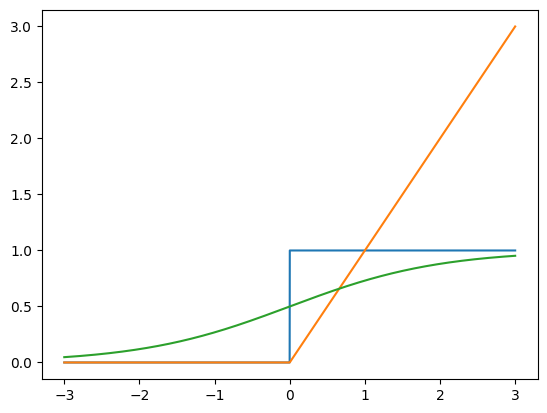

In [ ]:
x = np.linspace(-3, 3, num=3000)
y = step(x)
plt.plot(x, y)
y2 = relu(x)
plt.plot(x, y2)
y3 = sigmoid(x)
plt.plot(x, y3)


Q1_ McCulloch-Pits

In [ ]:
class McCulloch_pits():
  def __init__(self, weights, bias, activation=step):
    self.weights = weights
    self.bias = bias
    self.activation = activation
  def model(self, x):
    #return (self.weights @ x + self.bias>= 0 ).astype(int)
    return self.activation(self.weights @ x + self.bias)



Q1_ neural network

In [ ]:
def area(X):
  nu1 = McCulloch_pits([2, -1], -2)
  nu2 = McCulloch_pits([-2, -1], 6)
  nu3 = McCulloch_pits([0, 1], 0)
  nu_sum = McCulloch_pits([1, 1, 1], -3)

  z1 = nu1.model(np.array(X))
  z2 = nu2.model(np.array(X))
  z3 = nu3.model(np.array(X))
  z_s = nu_sum.model(np.array([z1, z2, z3]))

  return z_s

Function to check if a point is inside a triangle

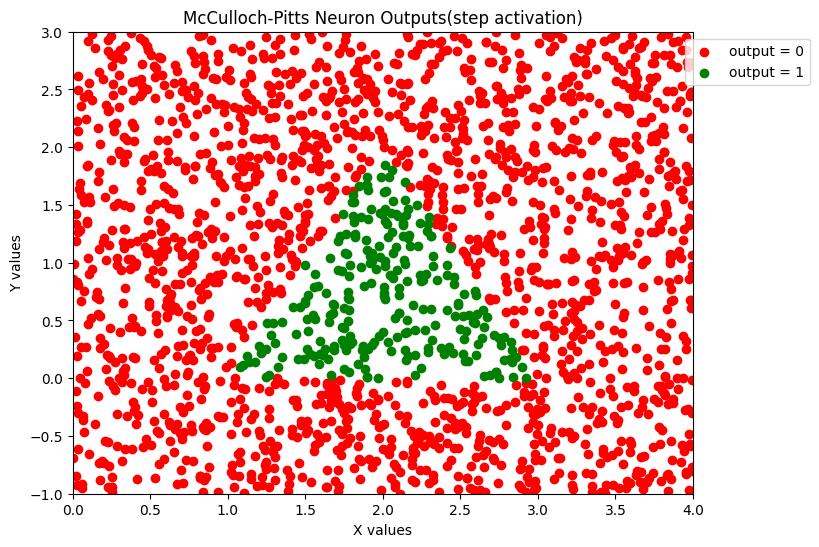

In [ ]:
# Generate random data points
num_points = 2000
np.random.seed(14)
points_x1 = np.random.uniform(0, 4, num_points)
points_x2 = np.random.uniform(-1, 3, num_points)



labels = area([points_x1, points_x2])

red_x = points_x1[np.where(labels==0)]
red_y = points_x2[np.where(labels==0)]

green_x = points_x1[np.where(labels==1)]
green_y = points_x2[np.where(labels==1)]


# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='output = 0')
plt.scatter(green_x, green_y, color='green', label='output = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs(step activation)')


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.show()


In [ ]:
def area(X):
  nu1 = McCulloch_pits([2, -1], -2, activation=sigmoid)
  nu2 = McCulloch_pits([-2, -1], 6, activation=sigmoid)
  nu3 = McCulloch_pits([0, 1], 0, activation=sigmoid)
  nu_sum = McCulloch_pits([1, 1, 1], -3, activation=sigmoid)

  z1 = nu1.model(np.array(X))
  z2 = nu2.model(np.array(X))
  z3 = nu3.model(np.array(X))
  z_s = nu_sum.model(np.array([z1, z2, z3]))

  return z_s

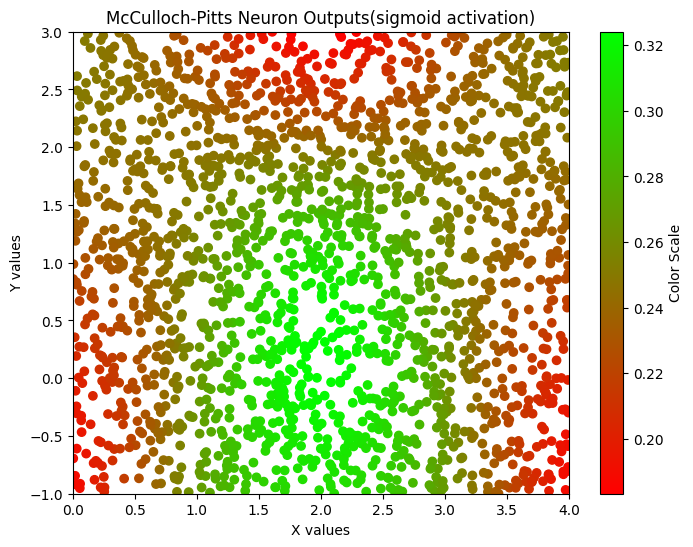

In [ ]:
# Generate random data points
num_points = 2000
np.random.seed(14)
points_x1 = np.random.uniform(0, 4, num_points)
points_x2 = np.random.uniform(-1, 3, num_points)



labels = area([points_x1, points_x2])

cdict = {'red':   [(0.0, 1.0, 1.0),
                   (1.0, 0.0, 0.0)],
         'green': [(0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)],
         'blue':  [(0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)]}
custom_cmap = LinearSegmentedColormap('RedGreen', cdict)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(points_x1, points_x2, c=labels, cmap=custom_cmap)
plt.colorbar(label='Color Scale')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs(sigmoid activation)')


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)


plt.show()

In [ ]:
def area(X):
  nu1 = McCulloch_pits([2, -1], -2, activation=relu)
  nu2 = McCulloch_pits([-2, -1], 6, activation=relu)
  nu3 = McCulloch_pits([0, 1], 0, activation=relu)
  nu_sum = McCulloch_pits([1, 1, 1], -3, activation=relu)

  z1 = nu1.model(np.array(X))
  z2 = nu2.model(np.array(X))
  z3 = nu3.model(np.array(X))
  z_s = nu_sum.model(np.array([z1, z2, z3]))

  return z_s

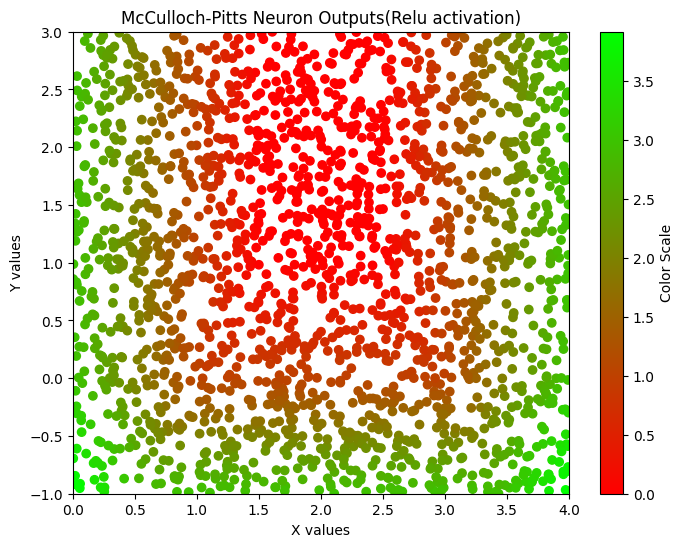

In [ ]:
# Generate random data points
num_points = 2000
np.random.seed(14)
points_x1 = np.random.uniform(0, 4, num_points)
points_x2 = np.random.uniform(-1, 3, num_points)



labels = area([points_x1, points_x2])

cdict = {'red':   [(0.0, 1.0, 1.0),
                   (1.0, 0.0, 0.0)],
         'green': [(0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)],
         'blue':  [(0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)]}
custom_cmap = LinearSegmentedColormap('RedGreen', cdict)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(points_x1, points_x2, c=labels, cmap=custom_cmap )
plt.colorbar(label='Color Scale')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs(Relu activation)')


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)


plt.show()

Q2_ Download data

In [ ]:
!gdown 19F5BYI8wkfelRw4is4_ITz3pjEGkjsny
!gdown 1Fx_KS049xP_kaHsBIuzi902iI3uZGgDk
!gdown 16tgDqJ1eQ3u7XOOjUPad211dDsXBF9IW
!gdown 1MU1yB7HFp0aKC4UunqYUh_waCB1deoso

Downloading...
From (original): https://drive.google.com/uc?id=19F5BYI8wkfelRw4is4_ITz3pjEGkjsny
From (redirected): https://drive.google.com/uc?id=19F5BYI8wkfelRw4is4_ITz3pjEGkjsny&confirm=t&uuid=45b4e50e-c8a2-419e-b663-eaa1120ec7c8
To: /content/IR007_2_107.mat
100% 2.93M/2.93M [00:00<00:00, 92.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Fx_KS049xP_kaHsBIuzi902iI3uZGgDk
From (redirected): https://drive.google.com/uc?id=1Fx_KS049xP_kaHsBIuzi902iI3uZGgDk&confirm=t&uuid=784c80a1-a99f-403d-b7cd-cc27ef62d470
To: /content/B007_2_120.mat
100% 2.92M/2.92M [00:00<00:00, 109MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=16tgDqJ1eQ3u7XOOjUPad211dDsXBF9IW
From (redirected): https://drive.google.com/uc?id=16tgDqJ1eQ3u7XOOjUPad211dDsXBF9IW&confirm=t&uuid=d8d41781-68b8-4648-b736-caa71f94dbfe
To: /content/Normal_2_99.mat
100% 15.5M/15.5M [00:00<00:00, 80.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1MU1yB7HFp0aKC4UunqYUh_waCB1de

Q2_ Data extract

In [ ]:
normal = sio.loadmat('Normal_2_99.mat')
inner_race = sio.loadmat('IR007_2_107.mat')
ball = sio.loadmat('B007_2_120.mat')
outer_race = sio.loadmat('OR007@6_2_132.mat')
print('normal     :', normal.keys())
print('inner_race :',inner_race.keys())
print('ball       :',ball.keys())
print('outer_race :',outer_race.keys())

normal     : dict_keys(['__header__', '__version__', '__globals__', 'ans', 'X098_DE_time', 'X098_FE_time', 'X099_DE_time', 'X099_FE_time'])
inner_race : dict_keys(['__header__', '__version__', '__globals__', 'X107_DE_time', 'X107_FE_time', 'X107_BA_time', 'X107RPM'])
ball       : dict_keys(['__header__', '__version__', '__globals__', 'X120_DE_time', 'X120_FE_time', 'X120_BA_time', 'X120RPM'])
outer_race : dict_keys(['__header__', '__version__', '__globals__', 'X132_DE_time', 'X132_FE_time', 'X132_BA_time', 'X132RPM'])


Q2_ Check null data

In [ ]:
de_normal = normal['X099_DE_time']
fe_normal = normal['X099_FE_time']
de_inner_race = inner_race['X107_DE_time']
fe_inner_race = inner_race['X107_FE_time']
de_ball = ball['X120_DE_time']
fe_ball = ball['X120_FE_time']
de_outer_race = outer_race['X132_DE_time']
fe_outer_race = outer_race['X132_FE_time']

print(np.sum(np.isnan(de_normal)))
print(np.sum(np.isnan(fe_normal.shape)))
print(np.sum(np.isnan(de_inner_race.shape)))
print(np.sum(np.isnan(fe_inner_race.shape)))
print(np.sum(np.isnan(de_ball.shape)))
print(np.sum(np.isnan(fe_ball.shape)))
print(np.sum(np.isnan(de_outer_race.shape)))
print(np.sum(np.isnan(fe_outer_race.shape)))


0
0
0
0
0
0
0
0


Q2_ data shuffling

In [ ]:
no_samples = 10000
de = np.concatenate((de_normal[0:no_samples], de_inner_race[0:no_samples],
                     de_ball[0:no_samples], de_outer_race[0:no_samples]), axis=0)
fe = np.concatenate((fe_normal[0:no_samples], fe_inner_race[0:no_samples],
                     fe_ball[0:no_samples], fe_outer_race[0:no_samples]), axis=0)
target = np.concatenate((np.zeros(no_samples), np.ones(no_samples),
                         np.ones(no_samples)*2, np.ones(no_samples)*3), axis=0)

# Shuffling
np.random.seed(14);
perm1 = np.random.permutation(len(target));
de = de[perm1];
fe = fe[perm1];
target = target[perm1];


In [ ]:
def one_hot_encode(labels):
    num_classes = np.unique(labels)
    # Create an array of zeros with shape (len(labels), num_classes)
    one_hot = np.zeros((labels.size, len(num_classes)))
    # Set the appropriate elements to one
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot



Q2_ Convert target to one-hot

In [ ]:
target = one_hot_encode(target.astype(int))


Q2_ feature extraxction method

In [ ]:
def feature_extract(x1,x2,ep):
  xc = np.column_stack((x1,x2))
  xc_mean = np.mean(xc, axis=1)
  m = np.expand_dims(xc_mean, axis=1)
  m = np.concatenate((m,m), axis=1)
  c_axis = 1;

  feature = {'de': x1,'fe': x2}
  feature['std']  = np.std(xc, axis=c_axis)
  feature['p']    = np.amax(np.abs(xc), axis=c_axis)
  temp = np.std(xc, axis=c_axis)**3
  temp[temp == 0] = ep
  feature['ske']  = np.mean((xc-m)**3, axis=c_axis) / temp
  temp = np.std(xc, axis=c_axis)**4
  temp[temp == 0] = ep
  feature['kur']  = np.mean((xc-m)**4, axis=c_axis) / temp
  feature['rms']  = np.sqrt(np.mean(xc**2, axis=c_axis))
  temp = np.sqrt(np.mean(xc**2, axis=c_axis))
  temp[temp == 0] = ep
  feature['cf']   = np.amax(np.abs(xc), axis=c_axis) / temp
  feature['smr']  = np.mean(np.sqrt(np.abs(xc)), axis=c_axis) ** 2
  temp = np.mean(np.sqrt(np.abs(xc)), axis=c_axis) ** 2
  temp[temp == 0] = ep
  feature['clf']  = np.amax(np.abs(xc), axis=c_axis) / temp
  temp = np.mean(np.abs(xc), axis=c_axis)
  temp[temp == 0] = ep
  feature['sf']   = np.sqrt(np.mean(xc**2, axis=c_axis)) / temp
  temp = np.mean(np.abs(xc), axis=c_axis)
  temp[temp == 0] = ep
  feature['if1']  = np.amax(np.abs(xc), axis=c_axis) / temp
  feature['if2']  = np.max(np.abs(xc), axis=c_axis) / temp
  for key, value in feature.items():
    feature[key] = feature[key].flatten()
  return pd.DataFrame.from_dict(feature)

Q2_ Feature extract

In [ ]:
data = feature_extract(de,fe,1e-10).values
data.shape


(40000, 13)

Q2_ Data split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.4, random_state=14)
X_test,X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=14)


Q2_ Normalize1

In [ ]:
data_mean = X_train.mean(axis=0)
data_std = X_train.std(axis=0)

X_train = (X_train-data_mean)/data_std
X_test = (X_test-data_mean)/data_std
X_validation = (X_validation-data_mean)/data_std

Q2_ Normalize2

In [ ]:
data_min = X_train.min(axis=0)
data_max = X_train.max(axis=0)
X_train = (X_train - data_min) / (data_max - data_min)
X_test = (X_test - data_min) / (data_max - data_min)

In [ ]:
N = 200

train_len = len(y_train)
M_train = int(train_len/200)
X_train = X_train[0:M_train*N,:]
y_train = y_train[0:M_train*N,:]
X_train = X_train.reshape((M_train, N, data.shape[1]))
y_train = y_train.reshape((M_train, N, 4))

test_len = len(y_test)
M_test = int(test_len/200)
X_test = X_test[0:M_test*N, :]
y_test = y_test[0:M_test*N, :]
X_test = X_test.reshape((M_test, N, data.shape[1]))
y_test = y_test.reshape((M_test, N, 4))

validation_len = len(y_validation)
M_validation= int(validation_len/200)
X_validation = X_validation[0:M_validation*N,:]
y_validation = y_validation[0:M_validation*N, :]
X_validation = X_validation.reshape((M_validation, N, data.shape[1]))
y_validation = y_validation.reshape((M_validation, N, 4))

In [ ]:
def sigmoid(x):
    z = np.exp(-x)
    return 1 / (1 + z)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Softmax activation function
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=2, keepdims=True))
    return e_x / e_x.sum(axis=2, keepdims=True)



# Error calculation
def error(pred, real):
  n_samples = pred.shape[0]
  n_sequence = pred.shape[1]
  pred[pred < 1e-7] = 1e-7
  logp = -np.log(pred) * real
  loss = np.sum(logp) / (n_samples * n_sequence)
  return loss

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [ ]:
# MLP class
class MLP_GD:
    def __init__(self, input_dim, output_dim, hidden_layers, learning_rate, activation=sigmoid, output_activation=softmax):
        self.hidden_layers = hidden_layers
        self.lr = learning_rate  # Learning rate
        self.ip_dim = input_dim  # Number of input features
        self.op_dim = output_dim  # Number of output classes
        self.activation = activation
        self.output_activation = output_activation
        self.w = []
        self.b = []
        self.output = []
        self.error = []
        if activation == sigmoid:
          self.activation_derivative = sigmoid_derivative
        elif activation == relu:
          self.activation_derivative = relu_derivative

        self.w.append(np.random.randn(self.ip_dim, self.hidden_layers[0])*0.01)
        self.b.append(np.zeros((1, self.hidden_layers[0])))
        for i in range(len(self.hidden_layers)-1):
          self.w.append(np.random.randn(self.hidden_layers[i], self.hidden_layers[i+1])*0.01)
          self.b.append(np.zeros((1, self.hidden_layers[i+1])))
        self.w.append(np.random.randn(self.hidden_layers[-1], self.op_dim))
        self.b.append(np.zeros((1, self.op_dim)))

        # for i in self.b:
        #   print(i.shape)


    def feedforward(self,x):
        output = []
        output.append(self.activation((x @ self.w[0]) + self.b[0]))
        for i in range(len(self.hidden_layers)):
          if (i == len(self.hidden_layers)-1):
            output.append(self.output_activation(np.dot(output[-1], self.w[i+1]) + self.b[i+1]))
          else:
            output.append(self.activation(np.dot(output[-1], self.w[i+1]) + self.b[i+1]))
        return output

    def backprop(self,output, x, y):
        loss = error(output[-1], y)
        self.error.append(loss)
        print('Error :', loss)
        a_delta = []
        z_delta = []
        a_delta.append((output[-1]- y))
        for i in range(len(self.hidden_layers)):
          z_delta.append(np.dot(a_delta[-1], self.w[-1-i].T))
          a_delta.append(z_delta[-1] * self.activation_derivative(output[-2-i]))

        for i in range(len(self.hidden_layers)):
          self.w[-1-i] -= self.lr * np.tensordot(output[-2-i], a_delta[i], axes=([0, 1], [0, 1]))
          self.b[-1-i] -= self.lr * np.sum(a_delta[i], axis=(0, 1))

        self.w[0] -= self.lr * np.tensordot(x, a_delta[-1], axes=([0, 1], [0, 1]))
        self.b[0] -= self.lr * np.sum(a_delta[-1], axis=(0, 1))


    def fit(self, X_train, y_train, epochs=1000):
      for x in range(epochs):
        o = self.feedforward(X_train)
        self.backprop(o ,X_train, y_train)
      return self.error

    def predict(self, x):
        return self.feedforward(x)[-1]



In [ ]:
mlp_1 = MLP_GD(input_dim=13, hidden_layers=[25,25], output_dim=4, activation=sigmoid, output_activation=softmax, learning_rate=0.00001)
err = mlp_1.fit(X_train, y_train, 1000)

Error : 3.2925130618636103
Error : 1.9558578710382692
Error : 1.6616930291676086
Error : 1.465857579021126
Error : 1.3976731336068917
Error : 1.3864675858637894
Error : 1.3853172147881203
Error : 1.3850420017212313
Error : 1.384831236735498
Error : 1.3846237547408962
Error : 1.3844146407877984
Error : 1.384203049473266
Error : 1.3839884831763993
Error : 1.3837704378200284
Error : 1.3835484111771224
Error : 1.383321894349789
Error : 1.3830903744518186
Error : 1.3828533330762178
Error : 1.3826102458804062
Error : 1.3823605817446452
Error : 1.3821038020900827
Error : 1.3818393601936005
Error : 1.3815667005632855
Error : 1.3812852583601898
Error : 1.3809944588760312
Error : 1.3806937170687155
Error : 1.3803824371603035
Error : 1.3800600123014948
Error : 1.3797258243072177
Error : 1.3793792434680539
Error : 1.3790196284424499
Error : 1.378646326234821
Error : 1.3782586722647836
Error : 1.3778559905327938
Error : 1.377437593887521
Error : 1.3770027844002104
Error : 1.3765508538511935
Error :

In [ ]:
y_hat = np.argmax(mlp_1.predict(X_test), axis=-1)
y_predicted = np.argmax(y_test, axis=-1)
np.sum(np.equal(y_hat, y_predicted)/y_hat.size*100)


46.454166666666666

Text(0, 0.5, 'Loss')

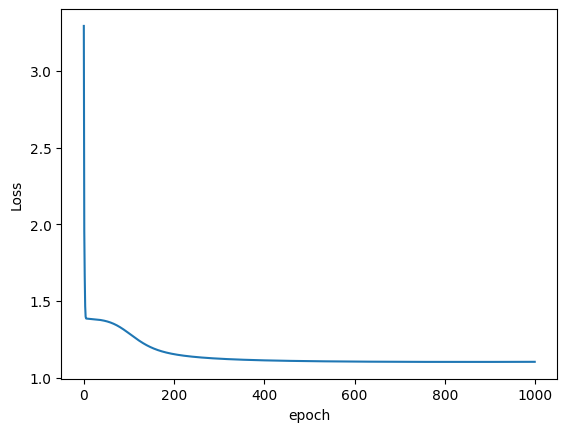

In [ ]:
plt.plot(mlp_1.error)
plt.xlabel('epoch')
plt.ylabel('Loss')

In [ ]:
mlp_2 = MLP_GD(input_dim=13, hidden_layers=[25,25], output_dim=4, activation=relu, output_activation=softmax, learning_rate=0.00001)
mlp_2.fit(X_train, y_train, 1000)

Error : 1.386533599465308
Error : 1.3859373739524306
Error : 1.3848673198579482
Error : 1.383548228396796
Error : 1.382107814903267
Error : 1.3801736851785886
Error : 1.377789503971953
Error : 1.3749534361690396
Error : 1.3713241767527682
Error : 1.3668981758051335
Error : 1.3608505504372128
Error : 1.3537724240865463
Error : 1.3456114462678772
Error : 1.3359942595345435
Error : 1.3256649872620188
Error : 1.3146986098621547
Error : 1.3036464426509955
Error : 1.2924774525234992
Error : 1.2817458971470914
Error : 1.2713115202377387
Error : 1.261048404473925
Error : 1.251524408571345
Error : 1.242730698684484
Error : 1.2346401335214194
Error : 1.2271797522132557
Error : 1.220332654406935
Error : 1.2140648172118493
Error : 1.2083111960895005
Error : 1.2029575124486207
Error : 1.1979689077326683
Error : 1.1933103732869115
Error : 1.1889499563384183
Error : 1.1848475716647746
Error : 1.1809460222736055
Error : 1.1771645620936675
Error : 1.1733522881040568
Error : 1.1691706556857946
Error : 1

[1.386533599465308,
 1.3859373739524306,
 1.3848673198579482,
 1.383548228396796,
 1.382107814903267,
 1.3801736851785886,
 1.377789503971953,
 1.3749534361690396,
 1.3713241767527682,
 1.3668981758051335,
 1.3608505504372128,
 1.3537724240865463,
 1.3456114462678772,
 1.3359942595345435,
 1.3256649872620188,
 1.3146986098621547,
 1.3036464426509955,
 1.2924774525234992,
 1.2817458971470914,
 1.2713115202377387,
 1.261048404473925,
 1.251524408571345,
 1.242730698684484,
 1.2346401335214194,
 1.2271797522132557,
 1.220332654406935,
 1.2140648172118493,
 1.2083111960895005,
 1.2029575124486207,
 1.1979689077326683,
 1.1933103732869115,
 1.1889499563384183,
 1.1848475716647746,
 1.1809460222736055,
 1.1771645620936675,
 1.1733522881040568,
 1.1691706556857946,
 1.164243589107699,
 1.1605688831296597,
 1.1571955932301392,
 1.1539882131716297,
 1.1509043156598746,
 1.1479065991039739,
 1.1450132129113106,
 1.1422458254964414,
 1.139602641571094,
 1.1371395997444584,
 1.134890310565321,
 1.

In [ ]:
y_hat = np.argmax(mlp_2.predict(X_test), axis=-1)
y_predicted = np.argmax(y_test, axis=-1)
np.sum(np.equal(y_hat, y_predicted)/y_hat.size*100)


51.0125

Text(0, 0.5, 'Loss')

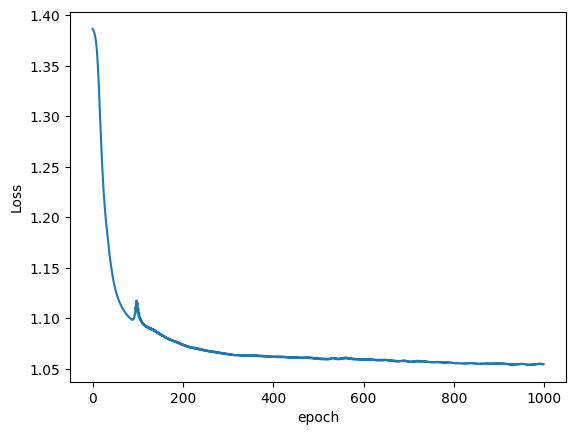

In [ ]:
plt.plot(mlp_2.error)
plt.xlabel('epoch')
plt.ylabel('Loss')

In [ ]:
# MLP class
class MLP_Adam:
    def __init__(self, input_dim, output_dim, hidden_layers, learning_rate, activation=sigmoid, output_activation=softmax, beta1=0.9, beta2=0.999):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate  # Learning rate
        self.ip_dim = input_dim  # Number of input features
        self.op_dim = output_dim  # Number of output classes
        self.activation = activation
        self.output_activation = output_activation
        self.w = []
        self.b = []
        self.output = []
        self.error = []
        if activation == sigmoid:
          self.activation_derivative = sigmoid_derivative
        elif activation == relu:
          self.activation_derivative = relu_derivative

        self.w.append(np.random.randn(self.ip_dim, self.hidden_layers[0]))
        self.b.append(np.zeros((1, self.hidden_layers[0])))
        for i in range(len(self.hidden_layers)-1):
          self.w.append(np.random.randn(self.hidden_layers[i], self.hidden_layers[i+1]))
          self.b.append(np.zeros((1, self.hidden_layers[i+1])))
        self.w.append(np.random.randn(self.hidden_layers[-1], self.op_dim))
        self.b.append(np.zeros((1, self.op_dim)))

        # for i in self.b:
        #   print(i.shape)

        # Adam optimizer parameters

        self.epsilon = 1e-8  # Small constant to prevent division by zero

        self.m_w = []
        self.v_w = []
        self.m_b = []
        self.v_b = []
        self.t = 0
        self.beta1 = beta1  # Exponential decay rate for the first moment estimates
        self.beta2 = beta2


        for i in self.w:
          self.m_w.append(np.zeros_like(i))
          self.v_w.append(np.zeros_like(i))

        for i in self.b:
          self.m_b.append(np.zeros_like(i))
          self.v_b.append(np.zeros_like(i))




    def feedforward(self,x):
        output = []
        output.append(self.activation((x @ self.w[0]) + self.b[0]))
        for i in range(len(self.hidden_layers)):
          if (i == len(self.hidden_layers)-1):
            output.append(self.output_activation(np.dot(output[-1], self.w[i+1]) + self.b[i+1]))
          else:
            output.append(self.activation(np.dot(output[-1], self.w[i+1]) + self.b[i+1]))
        return output

    def backprop(self,output, x, y):
        loss = error(output[-1], y)
        self.error.append(loss)
        print('Error :', loss)
        a_delta = []
        z_delta = []
        a_delta.append((output[-1]- y))
        for i in range(len(self.hidden_layers)):
          z_delta.append(np.dot(a_delta[-1], self.w[-1-i].T))
          a_delta.append(z_delta[-1] * self.activation_derivative(output[-2-i]))

        for i in range(len(self.hidden_layers)):
          grad_w = np.tensordot(output[-2-i], a_delta[i], axes=([0, 1], [0, 1]))
          [self.m_w[-1-i], self.v_w[-1-i], self.w[-1-i]] = self.update_params(self.w[-1-i], grad_w, self.m_w[-1-i], self.v_w[-1-i])
          grad_b = np.sum(a_delta[i], axis=(0, 1))
          [self.m_b[-1-i], self.v_b[-1-i], self.b[-1-i]] = self.update_params(self.b[-1-i], grad_b, self.m_b[-1-i], self.v_b[-1-i])

        grad_w = np.tensordot(x, a_delta[-1], axes=([0, 1], [0, 1]))
        [self.m_w[0], self.v_w[0], self.w[0]] = self.update_params(self.w[0], grad_w, self.m_w[0], self.v_w[0])
        grad_b = np.sum(a_delta[-1], axis=(0, 1))
        [self.m_b[0], self.v_b[0], self.b[0]] = self.update_params(self.b[0], grad_b, self.m_b[0], self.v_b[0])


    def update_params(self, param, grads, m, v, epsilon=1e-8):
        self.t += 1
        lr = self.learning_rate
        beta1 = self.beta1
        beta2 = self.beta2
        m_n = beta1 * m + (1 - beta1) * grads
        v_n = beta2 * v + (1 - beta2) * (grads ** 2)

        m_corrected = m_n / (1 - beta1 ** self.t)
        v_corrected = v_n / (1 - beta2 ** self.t)

        param_n = param - lr * m_corrected / (np.sqrt(v_corrected) + epsilon)
        return m_n, v_n, param_n

    def fit(self, X_train, y_train, epochs=1000):
      for x in range(epochs):
        o = self.feedforward(X_train)
        self.backprop(o ,X_train, y_train)
      return self.error

    def predict(self, x):
        return self.feedforward(x)[-1]



In [ ]:
mlp_3 = MLP_Adam(input_dim=13, hidden_layers=[25,25], output_dim=4, activation=sigmoid, output_activation=softmax, learning_rate=0.01)
err = mlp_3.fit(X_train, y_train, 1000)

Error : 3.8523500593062545
Error : 3.550659737783919
Error : 3.3169894539917357
Error : 3.068433370899264
Error : 2.803039101005366
Error : 2.5257921117974393
Error : 2.2458707342418323
Error : 1.9816785426754377
Error : 1.7646984949420137
Error : 1.6346267112075483
Error : 1.6124814478839598
Error : 1.6718226520423785
Error : 1.7559974989186946
Error : 1.8191840208501968
Error : 1.840687980636627
Error : 1.8196598564113489
Error : 1.76808228280706
Error : 1.7048361864942523
Error : 1.6480473691419382
Error : 1.6054492945085854
Error : 1.5693813879813214
Error : 1.5246562051045587
Error : 1.4632814966078658
Error : 1.3914354228078332
Error : 1.325505656291664
Error : 1.2822401143549298
Error : 1.2689588949174777
Error : 1.2799470878515458
Error : 1.3011329639254394
Error : 1.3182345736095804
Error : 1.3223427352112809
Error : 1.311358350857317
Error : 1.288793213557786
Error : 1.2614160169893744
Error : 1.236455718699926
Error : 1.2189537387372196
Error : 1.2101756764246374
Error : 1.2

<ipython-input-49-3c9b5a563458>:2: RuntimeWarning: overflow encountered in exp
  z = np.exp(-x)


Error : 1.1292845027627165
Error : 1.129435992549404
Error : 1.1295904442721745
Error : 1.1297469222867287
Error : 1.1299040934600995
Error : 1.1300603800685693
Error : 1.1302140027801792
Error : 1.1303627790866035
Error : 1.1305044847504002
Error : 1.1306373216058234
Error : 1.1307600334944223
Error : 1.1308721710442262
Error : 1.1309761648246281
Error : 1.1310793150403604
Error : 1.1311906156579348
Error : 1.1313155388605207
Error : 1.1314534484623056
Error : 1.131597129817256
Error : 1.1317358434800953
Error : 1.1318629173041856
Error : 1.1319774616448854
Error : 1.1320812714978576
Error : 1.1321731814776637
Error : 1.1322593319063479
Error : 1.1323390799078386
Error : 1.13241086884722
Error : 1.1324737116229637
Error : 1.132526455853701
Error : 1.1325674678139765
Error : 1.1325946649703225
Error : 1.132605961786311
Error : 1.1325998722112647
Error : 1.132575820548455
Error : 1.1325339936298053
Error : 1.132475007690247
Error : 1.1323998281886478
Error : 1.1323099291109657
Error : 1

In [ ]:
y_hat = np.argmax(mlp_3.predict(X_test), axis=-1)
y_predicted = np.argmax(y_test, axis=-1)
np.sum(np.equal(y_hat, y_predicted)/y_hat.size*100)

<ipython-input-49-3c9b5a563458>:2: RuntimeWarning: overflow encountered in exp
  z = np.exp(-x)


47.07916666666666

Text(0, 0.5, 'Loss')

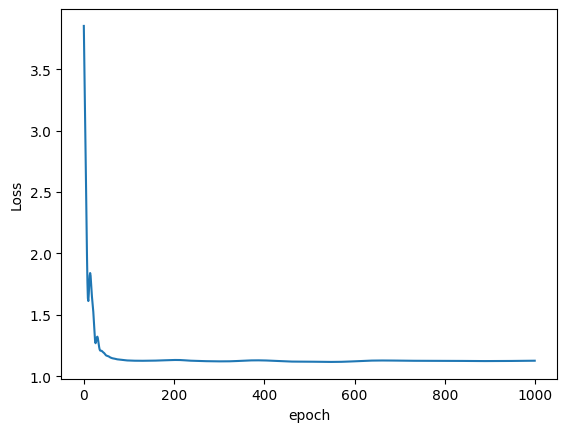

In [ ]:
plt.plot(mlp_3.error)
plt.xlabel('epoch')
plt.ylabel('Loss')

In [ ]:
mlp_4 = MLP_Adam(input_dim=13, hidden_layers=[25,25], output_dim=4, activation=relu, output_activation=softmax, learning_rate=0.01)
err = mlp_4.fit(X_train, y_train, 1000)

Error : 8.519740404627147
Error : 8.120474135034764
Error : 7.693192019478693
Error : 7.201118726266275
Error : 6.76926733855224
Error : 6.456539551245487
Error : 6.27394388851992
Error : 6.106096190902963
Error : 5.8692835559582965
Error : 5.5223888274209445
Error : 5.082592825896952
Error : 4.625648786506654
Error : 4.235121770271744
Error : 3.98336668853144
Error : 3.8680725069438098
Error : 3.8173555129836734
Error : 3.74125894080914
Error : 3.6034992233168093
Error : 3.4036014627459785
Error : 3.1843861832398987
Error : 2.9786724737951307
Error : 2.8259425594165113
Error : 2.7342287145879145
Error : 2.6558648350985123
Error : 2.562606940156162
Error : 2.4648157268142064
Error : 2.3689589552180452
Error : 2.265095707316499
Error : 2.1780087846122163
Error : 2.1231152160291193
Error : 2.074880615429299
Error : 2.025245231130184
Error : 1.966612488062613
Error : 1.9105988702025345
Error : 1.8718645212585592
Error : 1.8416352288674904
Error : 1.809362028380879
Error : 1.77494256693251

In [63]:
y_hat = np.argmax(mlp_4.predict(X_test), axis=-1)
y_predicted = np.argmax(y_test, axis=-1)
np.sum(np.equal(y_hat, y_predicted)/y_hat.size*100)

NameError: name 'mlp_4' is not defined

Text(0, 0.5, 'Loss')

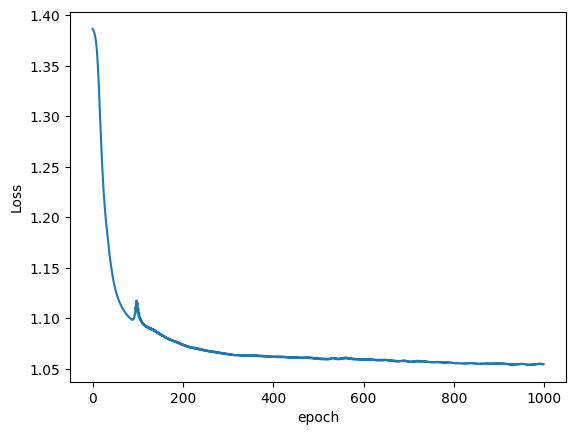

In [ ]:
plt.plot(mlp_2.error)
plt.xlabel('epoch')
plt.ylabel('Loss')

Q4_ Download dataset

In [5]:
!gdown 1F_Gv9ez1y6B4mruGZy9WKO9XWwC8tP0-

Downloading...
From: https://drive.google.com/uc?id=1F_Gv9ez1y6B4mruGZy9WKO9XWwC8tP0-
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 76.0MB/s]


Q4_ Show keys

In [6]:
data = pd.read_csv('heart.csv')
print(data.keys())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


1.age

2.sex

3.chest pain type (4 values)

4.resting blood pressure

5.serum cholestoral in mg/dl

6.fasting blood sugar > 120 mg/dl

7.resting electrocardiographic results (values 0,1,2)

8.maximum heart rate achieved

9.exercise induced angina

10.oldpeak = ST depression induced by exercise relative to rest

11.the slope of the peak exercise ST segment

12.number of major vessels (0-3) colored by flourosopy

13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy valu

Q4_ Check null data

In [7]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Q4_ Number of samples in every class

In [8]:
data.groupby('target').size()

target
0    499
1    526
dtype: int64

Q4_histogram

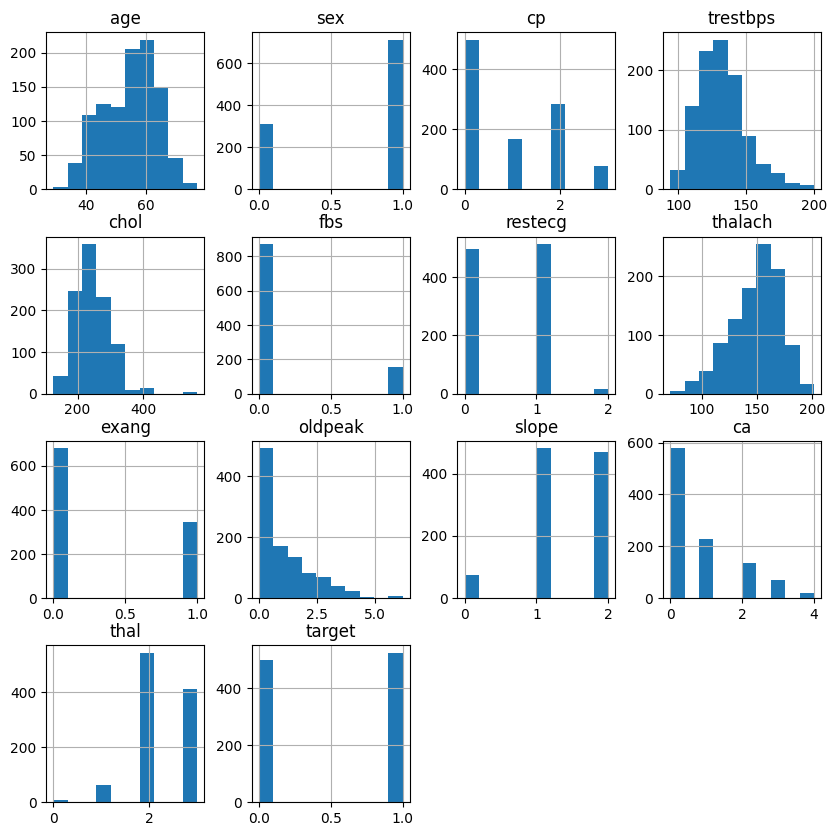

In [61]:
data.hist(figsize=(10,10));

<Axes: >

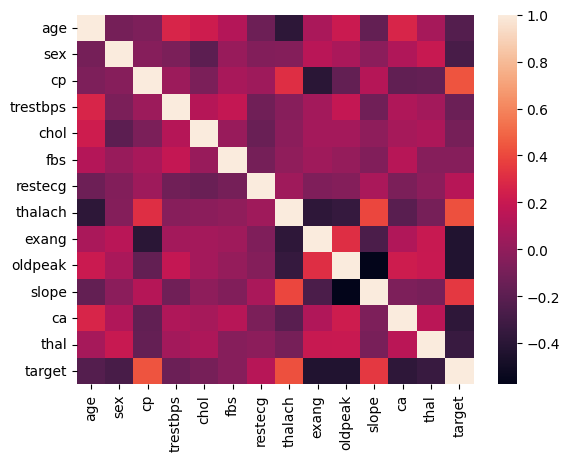

In [11]:
corr = data.corr()
sns.heatmap(corr)

Q4_train and test split

In [36]:
X = data.loc[:,data.columns!='target'].values
y = data.loc[:,data.columns=='target'].values
y = y.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)


Q4_NaiveBayes Classifier

In [37]:
class NaiveBayes:
  def fit(self, X, y):
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    self._mean = np.zeros([n_classes, n_features])
    self._std = np.zeros([n_classes, n_features])
    self._priors = np.zeros(n_classes)

    for idx,value in enumerate(self._classes):
      x = X[y==value]
      self._mean[idx, :] = np.mean(x ,axis=0)
      self._std[idx, :] = np.std(x, axis=0)
      self._priors[idx] = x.shape[0]/X.shape[0]

  def predict(self, X):
      y_pred = [self._predict(x) for x in X]
      return np.array(y_pred)

  def _predict(self, x):
    posteriors = []

    for idx, value in enumerate(self._classes):
      prior = np.log(self._priors[idx])
      posterior = np.sum(np.log(self._pdf(idx,x))) + prior
      posteriors.append(posterior)

    return self._classes[np.argmax(posteriors)]

  def _pdf(self, class_idx, x):
      mean = self._mean[class_idx]
      var = self._std[class_idx]
      numerator = np.exp(-((x - mean) ** 2) / (2 * var))
      denominator = np.sqrt(2 * np.pi * var)
      return numerator / denominator



Q4_ Model fit

In [38]:
MyNB = NaiveBayes()
MyNB.fit(X_train, y_train)

Q4_ Test

In [49]:
y_hat = MyNB.predict(X_test)
print('Accuracy :', np.sum(np.equal(y_hat, y_test))/y_hat.size*100, '%')

Accuracy : 74.14634146341463 %


Q4_ confusion matrix

96


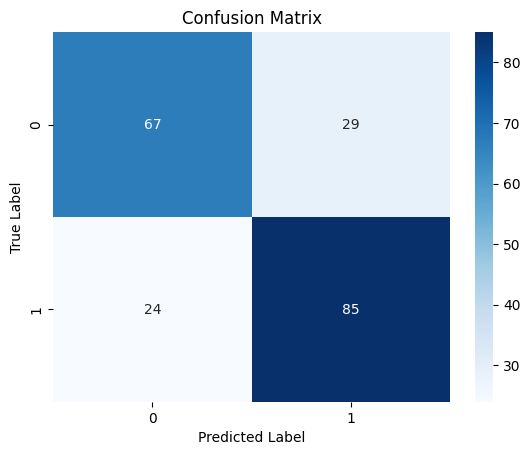

In [57]:
conf_matrix = confusion_matrix(y_test, y_hat)
print(np.sum(y_test == 0))
# Using seaborn
target_names = ['0','1']
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Q4_ classification_report

In [60]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_hat, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.70      0.72        96
     class 1       0.75      0.78      0.76       109

    accuracy                           0.74       205
   macro avg       0.74      0.74      0.74       205
weighted avg       0.74      0.74      0.74       205

